# Shifted Grid Tests

## 3 Runs:
  - normal (Fortran)
  - shifted (everything else standard)
  - full improved (shifted, Richardson-Fermions, Coeffs-Bosons, γ-tail improve)

## Open Problems

  - <del>First and last 2 frequencies for computation 3 are bad (reason?)</del>
      - <del>use old ν range sP.n_iν-sP.shift*(trunc(Int,sP.n_iω/2) )) ?</del>
      - cause: ω(ν) summation (skewed grid needs ν dependent ω summation)
  - <del>Σ_ladderLoc does not match Σ_DMFT for computation 2 and 3</del>
      - <del>γ .- γ2 could be a reason </del>
      - cause: wrong index conversion between Matsubara and base one
  - No coeffs for EoM

In [24]:
ENV["GKS_ENCODING"] = "utf-8"
using Plots
using LadderDGA
using Logging
using LaTeXStrings

io = stdout#devnull#stdout
metafmt(level::Logging.LogLevel, _module, group, id, file, line) = Logging.default_metafmt(level, nothing, group, id, nothing, nothing)
logger = ConsoleLogger(io, Logging.Info, meta_formatter=metafmt, show_limited=true, right_justify=0)
global_logger(logger);

In [25]:
cfg_file = "/home/julian/Hamburg/lDGA_shift_tests/cutoff_tests/conf_20_40_s0.toml";
cfg_file2 = "/home/julian/Hamburg/lDGA_shift_tests/cutoff_tests/conf_40_40_s0.toml";
cfg_file3 = "/home/julian/Hamburg/lDGA_shift_tests/cutoff_tests/conf_20_40_s1.toml";
cfg_file4 = "/home/julian/Hamburg/lDGA_shift_tests/cutoff_tests/conf_40_40_s1.toml";
labels = ["20_40_s0", "40_40_s0", "20_40_s1", "40_40_s1"]

mP, sP, env, kGrids, qGridLoc, freqList = readConfig(cfg_file)
kG = kGrids[1]
νGrid, sumHelper_f, impQ_sp, impQ_ch, GImp, GLoc, GLoc_fft, Σ_loc, FUpDo  = setup_LDGA(kG, freqList, mP, sP, env);

mP2, sP2, env2, kGrids2, qGridLoc2, freqList2 = readConfig(cfg_file2)
kG2 = kGrids2[1]
νGrid2, sumHelper_f2, impQ_sp2, impQ_ch2, GImp2, GLoc2, GLoc_fft2, Σ_loc2, FUpDo2 = setup_LDGA(kG2, freqList2, mP2, sP2, env2);

mP3, sP3, env3, kGrids3, qGridLoc3, freqList3 = readConfig(cfg_file3)
kG3 = kGrids3[1]
νGrid3, sumHelper_f3, impQ_sp3, impQ_ch3, GImp3, GLoc3, GLoc_fft3, Σ_loc3, FUpDo3 = setup_LDGA(kG3, freqList3, mP3, sP3, env3);

mP4, sP4, env4, kGrids4, qGridLoc4, freqList4 = readConfig(cfg_file4)
kG4 = kGrids4[1]
νGrid4, sumHelper_f4, impQ_sp4, impQ_ch4, GImp4, GLoc4, GLoc_fft4, Σ_loc4, FUpDo4 = setup_LDGA(kG4, freqList4, mP4, sP4, env4);

[ Info: Reading Inputs...
[ Info: setting usable ranges of sp and ch channel from 9:33 and 9:33 to the same range of 9:33
┌ Info: Inputs Read. Starting Computation.
│ Local susceptibilities with ranges are:
│ χLoc_sp(9:33) = 0.221, χLoc_ch(9:33) = 0.1406 
└ sum χupup check (fit, tail sub, tail sub + fit, expected): 0.18077583329023167 ?≈? 0.21780919399404888 ?=? 0.21780919399404888 ?≈? 0.25"
[ Info: Reading Inputs...
[ Info: setting usable ranges of sp and ch channel from 29:53 and 29:53 to the same range of 29:53
┌ Info: Inputs Read. Starting Computation.
│ Local susceptibilities with ranges are:
│ χLoc_sp(29:53) = 0.221, χLoc_ch(29:53) = 0.1406 
└ sum χupup check (fit, tail sub, tail sub + fit, expected): 0.18077583191133947 ?≈? 0.21780919261515663 ?=? 0.21780919261515663 ?≈? 0.25"
[ Info: Reading Inputs...
[ Info: setting usable ranges of sp and ch channel from 3:39 and 3:39 to the same range of 3:39
┌ Info: Inputs Read. Starting Computation.
│ Local susceptibilities with ranges are

In [26]:
calc_Σ_dbg = LadderDGA.calc_Σ_dbg
# "local" correction quantities
bubbleLoc = calc_bubble(νGrid, GImp, qGridLoc, mP, sP);
locQ_sp = calc_χ_trilex(impQ_sp.Γ, bubbleLoc, qGridLoc, νGrid, sumHelper_f, mP.U, mP, sP);
locQ_ch = calc_χ_trilex(impQ_ch.Γ, bubbleLoc, qGridLoc, νGrid, sumHelper_f, -mP.U, mP, sP);
Σ_ladderLoc,Σ_ladderLoc_ω,tmp_loc = calc_Σ_dbg(locQ_sp, locQ_ch, bubbleLoc, GImp, FUpDo,
                     qGridLoc, sumHelper_f, mP, sP)
Σ_ladderLoc = Σ_ladderLoc .+ mP.n * mP.U/2.0;

bubbleLoc2 = calc_bubble(νGrid2, GImp2, qGridLoc2, mP2, sP2);
locQ_sp2 = calc_χ_trilex(impQ_sp2.Γ, bubbleLoc2, qGridLoc, νGrid2, sumHelper_f2, mP2.U, mP2, sP2);
locQ_ch2 = calc_χ_trilex(impQ_ch2.Γ, bubbleLoc2, qGridLoc, νGrid2, sumHelper_f2, -mP2.U, mP2, sP2);
Σ_ladderLoc2,Σ_ladderLoc_ω2,tmp_loc2 = calc_Σ_dbg(locQ_sp2, locQ_ch2, bubbleLoc2, GImp2, FUpDo2,
                     qGridLoc, sumHelper_f2, mP2, sP2)
Σ_ladderLoc2 = Σ_ladderLoc2 .+ mP2.n * mP2.U/2.0;

bubbleLoc3 = calc_bubble(νGrid3, GImp3, qGridLoc3, mP3, sP3);
locQ_sp3 = calc_χ_trilex(impQ_sp3.Γ, bubbleLoc3, qGridLoc3, νGrid3, sumHelper_f3, mP3.U, mP3, sP3);
locQ_ch3 = calc_χ_trilex(impQ_ch3.Γ, bubbleLoc3, qGridLoc3, νGrid3, sumHelper_f3, -mP3.U, mP3, sP3);
Σ_ladderLoc3,Σ_ladderLoc_ω3,tmp_loc3 = calc_Σ_dbg(locQ_sp3, locQ_ch3, bubbleLoc3, GImp3, FUpDo3,
                     qGridLoc3, sumHelper_f3, mP3, sP3)
Σ_ladderLoc3 = Σ_ladderLoc3 .+ mP3.n * mP3.U/2.0;

bubbleLoc4 = calc_bubble(νGrid4, GImp4, qGridLoc4, mP4, sP4);
locQ_sp4 = calc_χ_trilex(impQ_sp4.Γ, bubbleLoc4, qGridLoc4, νGrid4, sumHelper_f4,  mP4.U, mP4, sP4);
locQ_ch4 = calc_χ_trilex(impQ_ch4.Γ, bubbleLoc4, qGridLoc4, νGrid4, sumHelper_f4, -mP4.U, mP4, sP4);
Σ_ladderLoc4,Σ_ladderLoc_ω4, tmp_loc4 = calc_Σ_dbg(locQ_sp4, locQ_ch4, bubbleLoc4, GImp4, FUpDo4,
          qGridLoc4, sumHelper_f4, mP4, sP4)
Σ_ladderLoc4 = Σ_ladderLoc4 .+ mP4.n * mP4.U/2.0;

In [27]:
Σ_ladderLoc_check = calc_Σ(locQ_sp, locQ_ch, bubbleLoc, GImp, FUpDo,
                     qGridLoc, sumHelper_f, mP, sP) .+ mP.n * mP.U/2.0;

Σ_ladderLoc_check2 = calc_Σ(locQ_sp2, locQ_ch2, bubbleLoc2, GImp2, FUpDo2,
                     qGridLoc, sumHelper_f2, mP2, sP2) .+ mP2.n * mP2.U/2.0;

Σ_ladderLoc_check3 = calc_Σ(locQ_sp3, locQ_ch3, bubbleLoc3, GImp3, FUpDo3,
                     qGridLoc3, sumHelper_f3, mP3, sP3) .+ mP3.n .* mP3.U/2.0;

Σ_ladderLoc_check4 = calc_Σ(locQ_sp4, locQ_ch4, bubbleLoc4, GImp4, FUpDo4,
                     qGridLoc4, sumHelper_f4, mP4, sP4) .+ mP4.n .* mP4.U/2.0;

[ Warning: running out of data for νn = 39 to 39 at ωn = 2, 2
[ Warning: running out of data for νn = 39 to 39 at ωn = 3, 3
[ Warning: running out of data for νn = 38 to 39 at ωn = 4, 4
[ Warning: running out of data for νn = 38 to 39 at ωn = 5, 5
[ Warning: running out of data for νn = 37 to 39 at ωn = 6, 6
[ Warning: running out of data for νn = 37 to 39 at ωn = 7, 7
[ Warning: running out of data for νn = 36 to 39 at ωn = 8, 8
[ Warning: running out of data for νn = 36 to 39 at ωn = 9, 9
[ Warning: running out of data for νn = 35 to 39 at ωn = 10, 10
[ Warning: running out of data for νn = 35 to 39 at ωn = 11, 11
[ Warning: running out of data for νn = 34 to 39 at ωn = 12, 12
[ Warning: running out of data for νn = 34 to 39 at ωn = 13, 13
[ Warning: running out of data for νn = 33 to 39 at ωn = 14, 14
[ Warning: running out of data for νn = 33 to 39 at ωn = 15, 15
[ Warning: running out of data for νn = 32 to 39 at ωn = 16, 16
[ Warning: running out of data for νn = 32 to 39 at ωn =

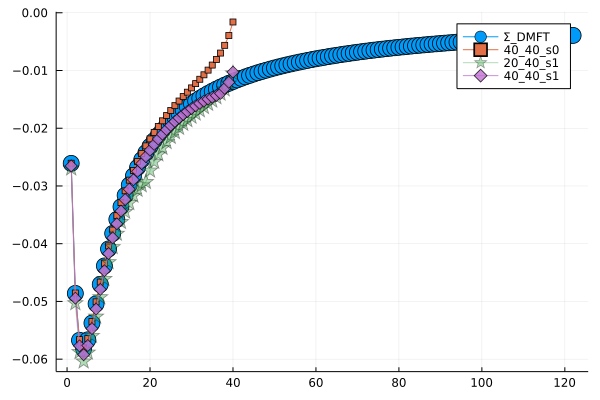

In [54]:
plot(imag(Σ_loc), markershape=:auto,markersize=9, label="Σ_DMFT")
#plot!(imag(Σ_ladderLoc[1:end-25]), markershape=:auto, label=labels[1])
plot!(imag(Σ_ladderLoc2[1:end]), markershape=:auto, markersize=3, label=labels[2])
plot!(imag(Σ_ladderLoc3), markershape=:auto, label=labels[3], markersize=8, alpha=0.4)
plot!(imag(Σ_ladderLoc4), markershape=:auto, markersize=6, alpha=0.8, label=labels[4])

In [29]:
# non local quantities 
bubble = calc_bubble(νGrid, GLoc_fft, kG, mP, sP);
nlQ_sp = calc_χ_trilex(impQ_sp.Γ, bubble, kG, νGrid, sumHelper_f,  mP.U, mP, sP);
nlQ_ch = calc_χ_trilex(impQ_ch.Γ, bubble, kG, νGrid, sumHelper_f, -mP.U, mP, sP);

nlQ_sp_nλ = deepcopy(nlQ_sp)
nlQ_ch_nλ = deepcopy(nlQ_ch)
λ_sp, λ_spch  = λ_correction!(impQ_sp, impQ_ch, FUpDo, Σ_loc, Σ_ladderLoc, nlQ_sp, nlQ_ch, bubble, GLoc_fft, kG, mP, sP)

# non local quantities 
bubble2 = calc_bubble(νGrid2, GLoc_fft2, kG, mP2, sP2);
nlQ_sp2 = calc_χ_trilex(impQ_sp2.Γ, bubble2, kG, νGrid2, sumHelper_f2,  mP2.U, mP2, sP2);
nlQ_ch2 = calc_χ_trilex(impQ_ch2.Γ, bubble2, kG, νGrid2, sumHelper_f2, -mP2.U, mP2, sP2);

nlQ_sp2_nλ = deepcopy(nlQ_sp2)
nlQ_ch2_nλ = deepcopy(nlQ_ch2)
λ_sp2, λ_spch2  = λ_correction!(impQ_sp2, impQ_ch2, FUpDo2, Σ_loc2, Σ_ladderLoc2, nlQ_sp2, nlQ_ch2, bubble2, GLoc_fft2, kG, mP2, sP2)

# non local quantities 
bubble3 = calc_bubble(νGrid3, GLoc_fft3, kG3, mP3, sP3);
nlQ_sp3 = calc_χ_trilex(impQ_sp3.Γ, bubble3, kG3, νGrid3, sumHelper_f3,  mP3.U, mP3, sP3);
nlQ_ch3 = calc_χ_trilex(impQ_ch3.Γ, bubble3, kG3, νGrid3, sumHelper_f3, -mP3.U, mP3, sP3);

nlQ_sp3_nλ = deepcopy(nlQ_sp3)
nlQ_ch3_nλ = deepcopy(nlQ_ch3)
λ_sp3, λ_spch3  = λ_correction!(impQ_sp3, impQ_ch3, FUpDo3, Σ_loc3, Σ_ladderLoc3, nlQ_sp3, nlQ_ch3, bubble3, GLoc_fft3, kG3, mP3, sP3)


# non local quantities 
bubble4 = calc_bubble(νGrid4, GLoc_fft4, kG4, mP4, sP4);
nlQ_sp4 = calc_χ_trilex(impQ_sp4.Γ, bubble4, kG4, νGrid4, sumHelper_f4,  mP4.U, mP4, sP4);
nlQ_ch4 = calc_χ_trilex(impQ_ch4.Γ, bubble4, kG4, νGrid4, sumHelper_f4, -mP4.U, mP4, sP4);

nlQ_sp4_nλ = deepcopy(nlQ_sp4)
nlQ_ch4_nλ = deepcopy(nlQ_ch4)
λ_sp4, λ_spch4  = λ_correction!(impQ_sp4, impQ_ch4, FUpDo4, Σ_loc4, Σ_ladderLoc4, nlQ_sp4, nlQ_ch4, bubble4, GLoc_fft4, kG4, mP4, sP4)

┌ Info: Computing λsp corrected χsp, using 
│   sP.χFillType = lambda_χ_fill::ChiFillType = 1
└    as fill value outside usable ω range. = " as fill value outside usable ω range."
[ Warning: currently using min(usable_sp, usable_ch) = min(10:32,10:32) = 10:32 for all calculations. relax this?
┌ Info: Found usable intervals for non-local susceptibility of length 
│ sp: 10:32, length: 23
│ ch: 10:32, length: 23
│ usable: 10:32, length: 23
└ χch sum = 0.17305144481209708, rhs = 0.18850022176836626
┌ Info: found 
│   χ_min = -0.23623728415022102
└   ". Looking for roots in intervall $(int)" = ". Looking for roots in intervall [-0.23623728415022102, 4.7247456830044205]"
┌ Info: Found λsp 
└   λsp = 1.5795485912522775
[ Info: new lambda correction: λsp=0.0 and λch=0.0
┌ Info: Computing λsp corrected χsp, using 
│   sP.χFillType = lambda_χ_fill::ChiFillType = 1
└    as fill value outside usable ω range. = " as fill value outside usable ω range."
[ Warning: currently using min(usable_sp, usabl

(0.20200790097999807, [0.0, 0.0])

In [30]:
Σ_ladder = calc_Σ(nlQ_sp, nlQ_ch, bubble, GLoc_fft, FUpDo, kG, sumHelper_f, mP, sP)
Σ_ladder_corrected = Σ_ladder .- Σ_ladderLoc .+ Σ_loc[1:size(Σ_ladder,1)];

Σ_ladder2 = calc_Σ(nlQ_sp2, nlQ_ch2, bubble2, GLoc_fft2, FUpDo2, kG2, sumHelper_f2, mP2, sP2)
Σ_ladder_corrected2 = Σ_ladder2 .- Σ_ladderLoc2 .+ Σ_loc[1:size(Σ_ladder2,1)];

Σ_ladder3 = calc_Σ(nlQ_sp3, nlQ_ch3, bubble3, GLoc_fft3, FUpDo3, kG3, sumHelper_f3, mP3, sP3)
Σ_ladder_corrected3 = Σ_ladder3 .- Σ_ladderLoc3 .+ Σ_loc[1:size(Σ_ladder3,1)];

Σ_ladder4 = calc_Σ(nlQ_sp4, nlQ_ch4, bubble4, GLoc_fft4, FUpDo4, kG4, sumHelper_f4, mP4, sP4)
Σ_ladder_corrected4 = Σ_ladder4 .- Σ_ladderLoc4 .+ Σ_loc[1:size(Σ_ladder4,1)];

[ Warning: running out of data for νn = 39 to 39 at ωn = 2, 2
[ Warning: running out of data for νn = 39 to 39 at ωn = 3, 3
[ Warning: running out of data for νn = 38 to 39 at ωn = 4, 4
[ Warning: running out of data for νn = 38 to 39 at ωn = 5, 5
[ Warning: running out of data for νn = 37 to 39 at ωn = 6, 6
[ Warning: running out of data for νn = 37 to 39 at ωn = 7, 7
[ Warning: running out of data for νn = 36 to 39 at ωn = 8, 8
[ Warning: running out of data for νn = 36 to 39 at ωn = 9, 9
[ Warning: running out of data for νn = 35 to 39 at ωn = 10, 10
[ Warning: running out of data for νn = 35 to 39 at ωn = 11, 11
[ Warning: running out of data for νn = 34 to 39 at ωn = 12, 12
[ Warning: running out of data for νn = 34 to 39 at ωn = 13, 13
[ Warning: running out of data for νn = 33 to 39 at ωn = 14, 14
[ Warning: running out of data for νn = 33 to 39 at ωn = 15, 15
[ Warning: running out of data for νn = 32 to 39 at ωn = 16, 16
[ Warning: running out of data for νn = 32 to 39 at ωn =

# Investigation of general differences
Before going through all terms individually, we try to get an overview of the differences between normal and shifted grids

In [31]:
using Printf
ωindices = (sP.dbg_full_eom_omega || sP.ωsum_type == :full) ? (1:size(bubbleLoc,1)) : intersect(locQ_sp.usable_ω, locQ_ch.usable_ω)
ωindices2 = (sP2.dbg_full_eom_omega || sP2.ωsum_type == :full) ? (1:size(bubbleLoc2,1)) : intersect(locQ_sp2.usable_ω, locQ_ch2.usable_ω)
U = mP.U
OneToIndex_to_Freq = LadderDGA.OneToIndex_to_Freq
χsp = locQ_sp.χ
χch = locQ_ch.χ
γsp = locQ_sp.γ
γch = locQ_ch.γ
χsp2 = locQ_sp2.χ
χch2 = locQ_ch2.χ
γsp2 = locQ_sp2.γ
γch2 = locQ_ch2.γ
shift2 = 1
ωZero2 = sP2.n_iω
νZero2 = sP2.n_iν
kGrid2 = qGridLoc
Gνω = GImp
Gνω2 = GImp2
kGrid = qGridLoc
νiRange = 21:30
Σw = Array{Complex{Float64}}(undef, length(ωindices), 1, size(bubble,3))
Σw2 = Array{Complex{Float64}}(undef, length(ωindices2), 1, size(bubble2,3))
errors = Array{Complex{Float64},3}(undef, length(νiRange), length(ωindices), 6)

println("  ν     ω     Δγsp       Δχsp       Δγch       Δχch       Δtmp        Δr")
println("---------------------------------------------------------------------------- ")
for (νii,νi) in enumerate(νiRange)
    for ωi in 1:length(ωindices)
        ωₙ = ωindices[ωi]
        fsp = 1.5 .* (1 .+ U*χsp[ωₙ, :])
        fch = 0.5 .* (1 .- U*χch[ωₙ, :])
        νZerop = 0 #νZero + shift*(trunc(Int64,(ωₙ - ωZero)/2))

        fsp2 = 1.5 .* (1 .+ U*χsp2[ωₙ, :])
        fch2 = 0.5 .* (1 .- U*χch2[ωₙ, :])
        νZerop2 = 0 #νZero2 + shift2*(trunc(Int64,(ωₙ - ωZero2 - 1)/2))
        #println("wn=$(ωₙ) - $(ωZero2) => $(trunc(Int64,(ωₙ - ωZero2 - 1)/2))")
        ωn, νn = OneToIndex_to_Freq(ωi, νi, sP)
        #println("$(ωi), $(νi), $(νZerop2+νi), $(tmp_loc2[ωi,:,νZerop2+νi])")
        Kνωq = γsp[ωₙ, :, νZerop+νi]    .* fsp  .- γch[ωₙ, :, νZerop+νi]   .* fch .- 1.5 .+ 0.5 .+  tmp_loc[ωi,:, νZerop+νi]
        Σw[ωi,:, νi]  = LadderDGA.conv_fft1(kGrid, Kνωq , view(Gνω , νn + ωn,:))
        
        Kνωq2 = γsp2[ωₙ, :, νZerop2+νi] .* fsp2 .- γch2[ωₙ, :, νZerop2+νi] .* fch2 .-1.5 .+ 0.5 .+ tmp_loc2[ωi,:,νZerop2+νi]
        Σw2[ωi,:, νi] = LadderDGA.conv_fft1(kGrid, Kνωq2, view(Gνω2, νn + ωn,:))
        errors[νii, ωi, : ] = [γsp[ωₙ, 1, νZerop+νi] .- γsp2[ωₙ, 1, νZerop2+νi]
                          χsp[ωₙ, 1] - χsp2[ωₙ, 1]
                          γch[ωₙ, 1, νZerop+νi]  .- γch2[ωₙ, 1, νZerop2+νi]
                          χch[ωₙ, 1] .- χch2[ωₙ, 1]
                          tmp_loc[ωi,1, νZerop+νi] .- tmp_loc2[ωi,1, νZerop+νi]
                          (γsp[ωₙ, :, νZerop+νi] .* fsp .- γch[ωₙ, :, νZerop+νi] .* fch) .- (γsp2[ωₙ, :, νZerop2+νi] .* fsp2 .- γch2[ωₙ, :, νZerop2+νi] .* fch2)]
        out = real.(errors[νii, ωi, : ])
        #@printf "%3d   %3d   %8.5f   %8.5f   %8.5f   %8.5f   %8.5f   %8.5f\n" νn ωn out[1] out[2] out[3] out[4] out[5] out[6]
    end
end

  ν     ω     Δγsp       Δχsp       Δγch       Δχch       Δtmp        Δr
---------------------------------------------------------------------------- 


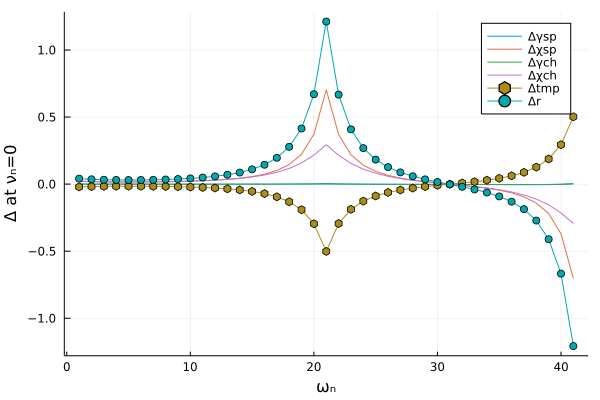

In [32]:
νi = 1
plot(real.(errors[νi,:,1]), label="Δγsp", xlabel="ωₙ", ylabel="Δ at νₙ=0")
plot!(real.(errors[νi,:,2]), label="Δχsp")
plot!(real.(errors[νi,:,3]), label="Δγch")
plot!(real.(errors[νi,:,4]), label="Δχch")
plot!(real.(errors[νi,:,5]), label="Δtmp", markershape=:hexagon)
plot!(real.(errors[νi,:,6]), label="Δr", markershape=:circle)

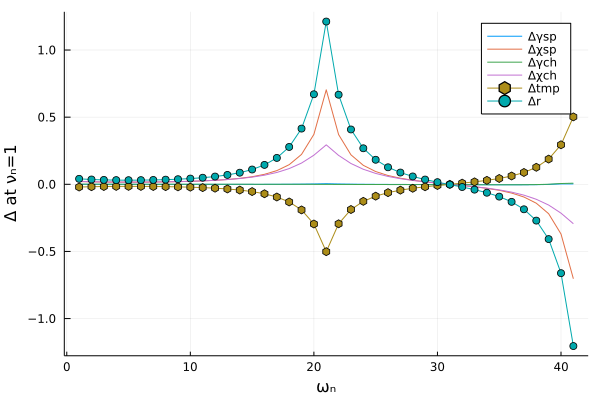

In [33]:
νi = 2
plot(real.(errors[νi,:,1]), label="Δγsp", xlabel="ωₙ", ylabel="Δ at νₙ=1")
plot!(real.(errors[νi,:,2]), label="Δχsp")
plot!(real.(errors[νi,:,3]), label="Δγch")
plot!(real.(errors[νi,:,4]), label="Δχch")
plot!(real.(errors[νi,:,5]), label="Δtmp", markershape=:hexagon)
plot!(real.(errors[νi,:,6]), label="Δr", markershape=:circle)

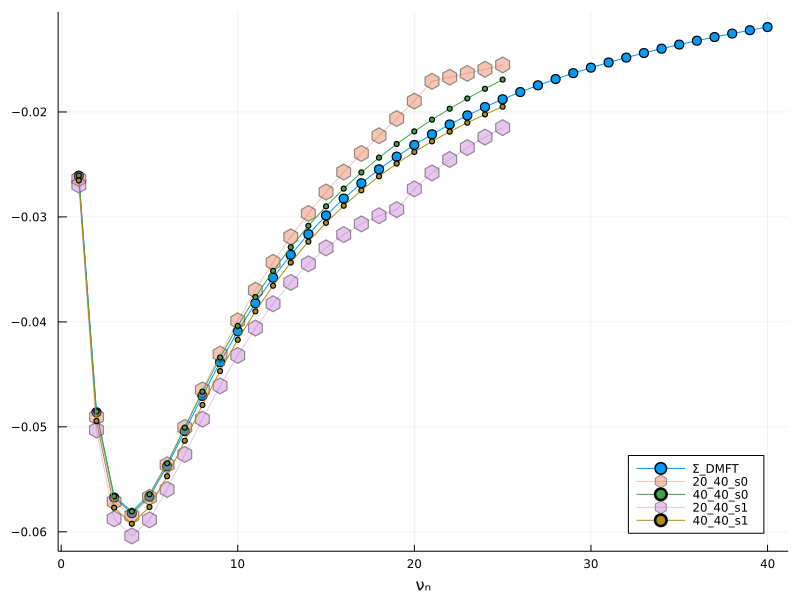

In [34]:
xarri = -20:19
xarr2 = (2 .* xarri .+ 3) .* π ./mP.β
usable_ω3 = intersect(locQ_sp3.usable_ω, locQ_ch3.usable_ω)
#(2 .* (1:20) .+ 1) .* π ./mP.β
plot(imag(Σ_loc3[1:40]), xlabel="νₙ", markershape=:circle, markersize=5, label="Σ_DMFT",size=(800,600),legend=:bottomright)
#plot!(imag(Σ_ladderLoc[sP.n_iν+1:end,1]), markershape=:circle, markersize=3, label="Σ_ladderLoc")
plot!(imag(Σ_ladderLoc[1:end-15,1]), markershape=:hexagon, markersize=8, alpha=0.4, label=labels[1])
plot!(imag(Σ_ladderLoc2[1:end-15,1]), markershape=:circle, markersize=3, label=labels[2])
plot!(imag(Σ_ladderLoc3[1:end-15,1]), markershape=:hexagon, markersize=8, alpha=0.4, label=labels[3])
plot!(imag(Σ_ladderLoc4[1:end-15,1]), markershape=:circle, markersize=3, label=labels[4])

# tmp(ω,q=0,ν!=0) Investigation

$\Sigma(\nu_{n>0})$ shows a large difference between normal and shifted grids. Possible cause is a bug in $tmp(\omega,q,\nu)$

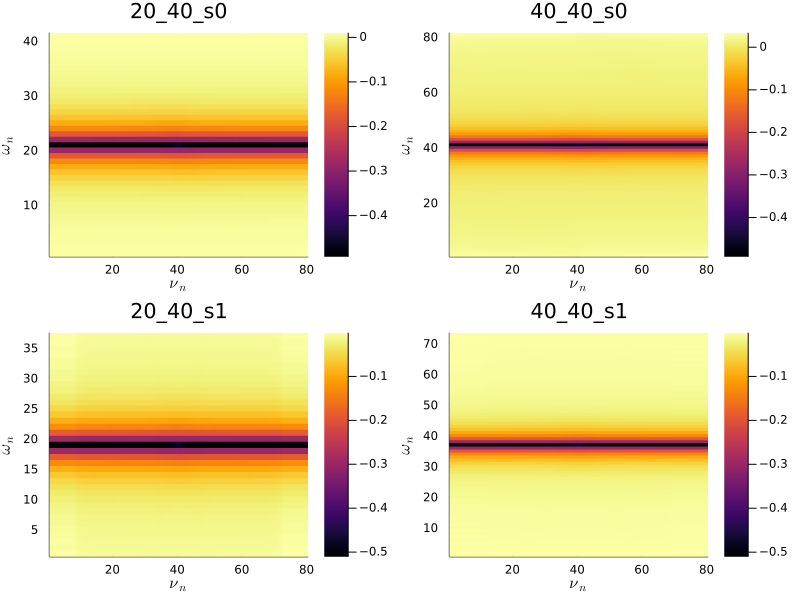

In [35]:
t = [-sP.n_iν:sP.n_iν-1,-sP.n_iω:sP.n_iω]
hms = [heatmap(real(tmp_loc[:,1,:]), ylabel=L"\omega_n", xlabel=L"\nu_n",title=labels[1])
    heatmap(real(tmp_loc2[:,1,:]),ylabel=L"\omega_n", xlabel=L"\nu_n", title=labels[2])
heatmap(real(tmp_loc3[:,1,:]),ylabel=L"\omega_n", xlabel=L"\nu_n", title=labels[3])
heatmap(real(tmp_loc4[:,1,:]),ylabel=L"\omega_n", xlabel=L"\nu_n", title=labels[4])]
plot(hms..., layout=(2,2), size=(800,600))

# γ(ω,q=0,ν!=0) Investigation

$\Sigma(\nu_{n>0})$ shows a large difference between normal and shifted grids. Possible cause is a bug in $\gamma(\omega,q,\nu)$

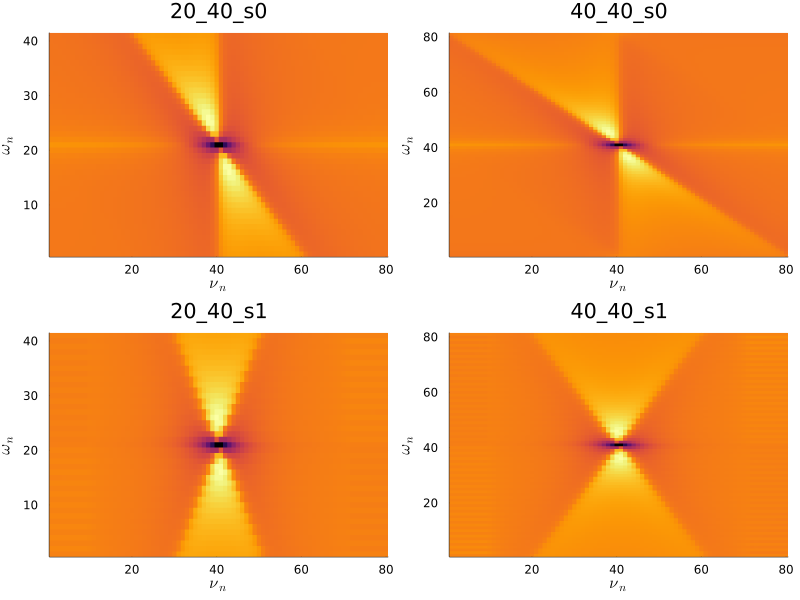

In [36]:

hms = [heatmap(real(locQ_sp.γ[:,1,:]), ylabel=L"\omega_n", xlabel=L"\nu_n", title=labels[1])
heatmap(real(locQ_sp2.γ[:,1,:]), ylabel=L"\omega_n", xlabel=L"\nu_n", title=labels[2])
heatmap(real(locQ_sp3.γ[:,1,:]), ylabel=L"\omega_n", xlabel=L"\nu_n", title=labels[3])
heatmap(real(locQ_sp4.γ[:,1,:]), ylabel=L"\omega_n", xlabel=L"\nu_n", title=labels[4])
]

plot(hms..., layout = (2,2), colorbar = false, size=(800,600))

# Σ_ladderLoc_ω Investigation

compute full EoM for local case directly as

$\Sigma^\text{direct}(\nu) = \frac{U n}{2} - \frac{U}{\beta^2} \sum_{\nu'\omega} F^{\nu\nu'\omega}_{\uparrow\downarrow}G_\text{Imp}(\nu')G_\text{Imp}(\nu'+\omega)G_\text{Imp}(\nu+\omega)$

AND

$\Sigma^\text{direct,bubble}(\nu) = \frac{U n}{2} - \frac{U}{\beta^2} \sum_{\nu'\omega} F^{\nu\nu'\omega}_{\uparrow\downarrow}(-\frac{\chi_0(\omega,\nu')}{\beta}) G_\text{Imp}(\nu+\omega)$

`Σ_direct3` and `Σ_direct4` are computed using the same code as in the `LadderDGA.jl` code.

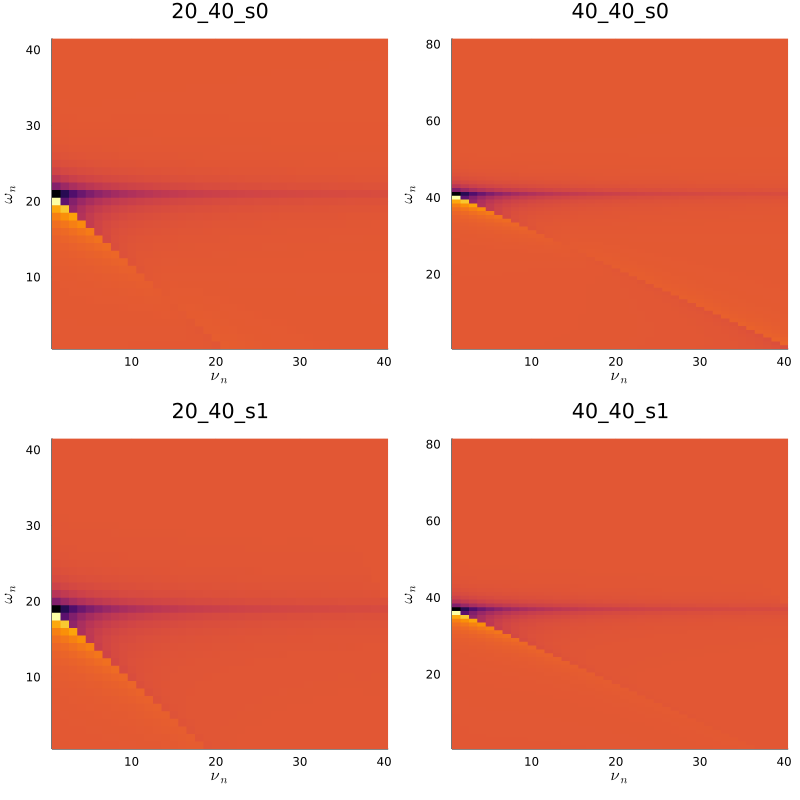

In [37]:

hms = [heatmap(imag(Σ_ladderLoc_ω[:,1,:]), ylabel=L"\omega_n", xlabel=L"\nu_n",title=labels[1])
 heatmap(imag(Σ_ladderLoc_ω2[:,1,:]), ylabel=L"\omega_n", xlabel=L"\nu_n",title=labels[2])
 heatmap(imag(Σ_ladderLoc_ω3[:,1,:]), ylabel=L"\omega_n", xlabel=L"\nu_n",title=labels[3])
 heatmap(imag(Σ_ladderLoc_ω4[:,1,:]), ylabel=L"\omega_n", xlabel=L"\nu_n",title=labels[4])
]
plot(hms..., layout = (2,2), colorbar = false, size=(800,800))

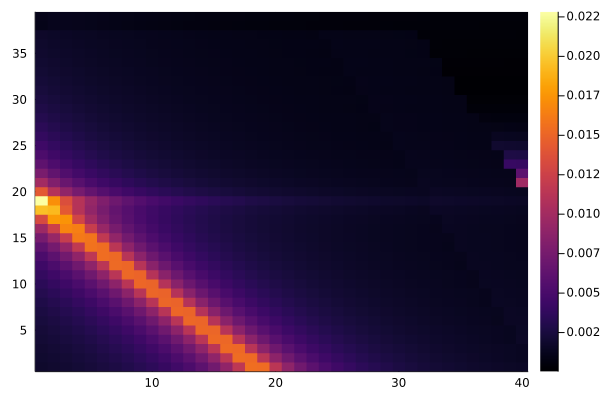

In [38]:
heatmap(abs.(Σ_ladderLoc_ω[3:end,1,:] .- Σ_ladderLoc_ω3[1:end-2,1,:]))

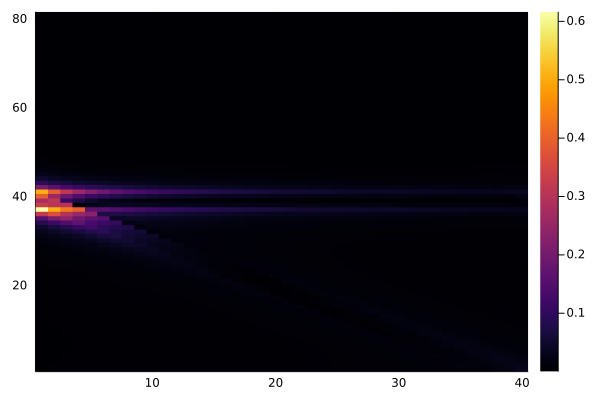

In [39]:
heatmap(abs.(Σ_ladderLoc_ω2[:,1,:] .- Σ_ladderLoc_ω4[:,1,:]))

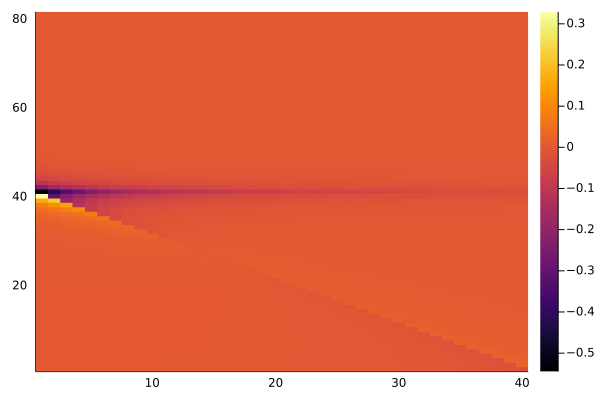

In [40]:
heatmap(imag(Σ_ladderLoc_ω2[:,1,:]))

In [41]:
ωindices = intersect(nlQ_sp3.usable_ω, nlQ_ch3.usable_ω)
for ωii in 1:length(ωindices)
ωi = ωindices[ωii]
ωn_n = ωi - sP3.n_iω - 1
ν0 = sP3.n_iν + trunc(Int, ωn_n/2) + 1
for (i,νi) in enumerate(1:size(nlQ_sp3.γ,3))
    ωn, νn = LadderDGA.OneToIndex_to_Freq(ωi, νi, sP3)
    is = i - sP3.shift*trunc(Int,ωn/2)
    println("($ωi,$νi) => ($ωn, $νn), $ωn_n => $ν0")
end
end

(3,1) => (-18, -31), -18 => 32
(3,2) => (-18, -30), -18 => 32
(3,3) => (-18, -29), -18 => 32
(3,4) => (-18, -28), -18 => 32
(3,5) => (-18, -27), -18 => 32
(3,6) => (-18, -26), -18 => 32
(3,7) => (-18, -25), -18 => 32
(3,8) => (-18, -24), -18 => 32
(3,9) => (-18, -23), -18 => 32
(3,10) => (-18, -22), -18 => 32
(3,11) => (-18, -21), -18 => 32
(3,12) => (-18, -20), -18 => 32
(3,13) => (-18, -19), -18 => 32
(3,14) => (-18, -18), -18 => 32
(3,15) => (-18, -17), -18 => 32
(3,16) => (-18, -16), -18 => 32
(3,17) => (-18, -15), -18 => 32
(3,18) => (-18, -14), -18 => 32
(3,19) => (-18, -13), -18 => 32
(3,20) => (-18, -12), -18 => 32
(3,21) => (-18, -11), -18 => 32
(3,22) => (-18, -10), -18 => 32
(3,23) => (-18, -9), -18 => 32
(3,24) => (-18, -8), -18 => 32
(3,25) => (-18, -7), -18 => 32
(3,26) => (-18, -6), -18 => 32
(3,27) => (-18, -5), -18 => 32
(3,28) => (-18, -4), -18 => 32
(3,29) => (-18, -3), -18 => 32
(3,30) => (-18, -2), -18 => 32
(3,31) => (-18, -1), -18 => 32
(3,32) => (-18, 0), -18 =>

(7,11) => (-14, -23), -14 => 34
(7,12) => (-14, -22), -14 => 34
(7,13) => (-14, -21), -14 => 34
(7,14) => (-14, -20), -14 => 34
(7,15) => (-14, -19), -14 => 34
(7,16) => (-14, -18), -14 => 34
(7,17) => (-14, -17), -14 => 34
(7,18) => (-14, -16), -14 => 34
(7,19) => (-14, -15), -14 => 34
(7,20) => (-14, -14), -14 => 34
(7,21) => (-14, -13), -14 => 34
(7,22) => (-14, -12), -14 => 34
(7,23) => (-14, -11), -14 => 34
(7,24) => (-14, -10), -14 => 34
(7,25) => (-14, -9), -14 => 34
(7,26) => (-14, -8), -14 => 34
(7,27) => (-14, -7), -14 => 34
(7,28) => (-14, -6), -14 => 34
(7,29) => (-14, -5), -14 => 34
(7,30) => (-14, -4), -14 => 34
(7,31) => (-14, -3), -14 => 34
(7,32) => (-14, -2), -14 => 34
(7,33) => (-14, -1), -14 => 34
(7,34) => (-14, 0), -14 => 34
(7,35) => (-14, 1), -14 => 34
(7,36) => (-14, 2), -14 => 34
(7,37) => (-14, 3), -14 => 34
(7,38) => (-14, 4), -14 => 34
(7,39) => (-14, 5), -14 => 34
(7,40) => (-14, 6), -14 => 34
(7,41) => (-14, 7), -14 => 34
(7,42) => (-14, 8), -14 => 34
(7,

(11,18) => (-10, -18), -10 => 36
(11,19) => (-10, -17), -10 => 36
(11,20) => (-10, -16), -10 => 36
(11,21) => (-10, -15), -10 => 36
(11,22) => (-10, -14), -10 => 36
(11,23) => (-10, -13), -10 => 36
(11,24) => (-10, -12), -10 => 36
(11,25) => (-10, -11), -10 => 36
(11,26) => (-10, -10), -10 => 36
(11,27) => (-10, -9), -10 => 36
(11,28) => (-10, -8), -10 => 36
(11,29) => (-10, -7), -10 => 36
(11,30) => (-10, -6), -10 => 36
(11,31) => (-10, -5), -10 => 36
(11,32) => (-10, -4), -10 => 36
(11,33) => (-10, -3), -10 => 36
(11,34) => (-10, -2), -10 => 36
(11,35) => (-10, -1), -10 => 36
(11,36) => (-10, 0), -10 => 36
(11,37) => (-10, 1), -10 => 36
(11,38) => (-10, 2), -10 => 36
(11,39) => (-10, 3), -10 => 36
(11,40) => (-10, 4), -10 => 36
(11,41) => (-10, 5), -10 => 36
(11,42) => (-10, 6), -10 => 36
(11,43) => (-10, 7), -10 => 36
(11,44) => (-10, 8), -10 => 36
(11,45) => (-10, 9), -10 => 36
(11,46) => (-10, 10), -10 => 36
(11,47) => (-10, 11), -10 => 36
(11,48) => (-10, 12), -10 => 36
(11,49) =

(15,34) => (-6, -4), -6 => 38
(15,35) => (-6, -3), -6 => 38
(15,36) => (-6, -2), -6 => 38
(15,37) => (-6, -1), -6 => 38
(15,38) => (-6, 0), -6 => 38
(15,39) => (-6, 1), -6 => 38
(15,40) => (-6, 2), -6 => 38
(15,41) => (-6, 3), -6 => 38
(15,42) => (-6, 4), -6 => 38
(15,43) => (-6, 5), -6 => 38
(15,44) => (-6, 6), -6 => 38
(15,45) => (-6, 7), -6 => 38
(15,46) => (-6, 8), -6 => 38
(15,47) => (-6, 9), -6 => 38
(15,48) => (-6, 10), -6 => 38
(15,49) => (-6, 11), -6 => 38
(15,50) => (-6, 12), -6 => 38
(15,51) => (-6, 13), -6 => 38
(15,52) => (-6, 14), -6 => 38
(15,53) => (-6, 15), -6 => 38
(15,54) => (-6, 16), -6 => 38
(15,55) => (-6, 17), -6 => 38
(15,56) => (-6, 18), -6 => 38
(15,57) => (-6, 19), -6 => 38
(15,58) => (-6, 20), -6 => 38
(15,59) => (-6, 21), -6 => 38
(15,60) => (-6, 22), -6 => 38
(15,61) => (-6, 23), -6 => 38
(15,62) => (-6, 24), -6 => 38
(15,63) => (-6, 25), -6 => 38
(15,64) => (-6, 26), -6 => 38
(15,65) => (-6, 27), -6 => 38
(15,66) => (-6, 28), -6 => 38
(15,67) => (-6, 29),

(19,55) => (-2, 15), -2 => 40
(19,56) => (-2, 16), -2 => 40
(19,57) => (-2, 17), -2 => 40
(19,58) => (-2, 18), -2 => 40
(19,59) => (-2, 19), -2 => 40
(19,60) => (-2, 20), -2 => 40
(19,61) => (-2, 21), -2 => 40
(19,62) => (-2, 22), -2 => 40
(19,63) => (-2, 23), -2 => 40
(19,64) => (-2, 24), -2 => 40
(19,65) => (-2, 25), -2 => 40
(19,66) => (-2, 26), -2 => 40
(19,67) => (-2, 27), -2 => 40
(19,68) => (-2, 28), -2 => 40
(19,69) => (-2, 29), -2 => 40
(19,70) => (-2, 30), -2 => 40
(19,71) => (-2, 31), -2 => 40
(19,72) => (-2, 32), -2 => 40
(19,73) => (-2, 33), -2 => 40
(19,74) => (-2, 34), -2 => 40
(19,75) => (-2, 35), -2 => 40
(19,76) => (-2, 36), -2 => 40
(19,77) => (-2, 37), -2 => 40
(19,78) => (-2, 38), -2 => 40
(19,79) => (-2, 39), -2 => 40
(19,80) => (-2, 40), -2 => 40
(20,1) => (-1, -40), -1 => 41
(20,2) => (-1, -39), -1 => 41
(20,3) => (-1, -38), -1 => 41
(20,4) => (-1, -37), -1 => 41
(20,5) => (-1, -36), -1 => 41
(20,6) => (-1, -35), -1 => 41
(20,7) => (-1, -34), -1 => 41
(20,8) => 

(24,12) => (3, -30), 3 => 42
(24,13) => (3, -29), 3 => 42
(24,14) => (3, -28), 3 => 42
(24,15) => (3, -27), 3 => 42
(24,16) => (3, -26), 3 => 42
(24,17) => (3, -25), 3 => 42
(24,18) => (3, -24), 3 => 42
(24,19) => (3, -23), 3 => 42
(24,20) => (3, -22), 3 => 42
(24,21) => (3, -21), 3 => 42
(24,22) => (3, -20), 3 => 42
(24,23) => (3, -19), 3 => 42
(24,24) => (3, -18), 3 => 42
(24,25) => (3, -17), 3 => 42
(24,26) => (3, -16), 3 => 42
(24,27) => (3, -15), 3 => 42
(24,28) => (3, -14), 3 => 42
(24,29) => (3, -13), 3 => 42
(24,30) => (3, -12), 3 => 42
(24,31) => (3, -11), 3 => 42
(24,32) => (3, -10), 3 => 42
(24,33) => (3, -9), 3 => 42
(24,34) => (3, -8), 3 => 42
(24,35) => (3, -7), 3 => 42
(24,36) => (3, -6), 3 => 42
(24,37) => (3, -5), 3 => 42
(24,38) => (3, -4), 3 => 42
(24,39) => (3, -3), 3 => 42
(24,40) => (3, -2), 3 => 42
(24,41) => (3, -1), 3 => 42
(24,42) => (3, 0), 3 => 42
(24,43) => (3, 1), 3 => 42
(24,44) => (3, 2), 3 => 42
(24,45) => (3, 3), 3 => 42
(24,46) => (3, 4), 3 => 42
(24,

(29,20) => (8, -25), 8 => 45
(29,21) => (8, -24), 8 => 45
(29,22) => (8, -23), 8 => 45
(29,23) => (8, -22), 8 => 45
(29,24) => (8, -21), 8 => 45
(29,25) => (8, -20), 8 => 45
(29,26) => (8, -19), 8 => 45
(29,27) => (8, -18), 8 => 45
(29,28) => (8, -17), 8 => 45
(29,29) => (8, -16), 8 => 45
(29,30) => (8, -15), 8 => 45
(29,31) => (8, -14), 8 => 45
(29,32) => (8, -13), 8 => 45
(29,33) => (8, -12), 8 => 45
(29,34) => (8, -11), 8 => 45
(29,35) => (8, -10), 8 => 45
(29,36) => (8, -9), 8 => 45
(29,37) => (8, -8), 8 => 45
(29,38) => (8, -7), 8 => 45
(29,39) => (8, -6), 8 => 45
(29,40) => (8, -5), 8 => 45
(29,41) => (8, -4), 8 => 45
(29,42) => (8, -3), 8 => 45
(29,43) => (8, -2), 8 => 45
(29,44) => (8, -1), 8 => 45
(29,45) => (8, 0), 8 => 45
(29,46) => (8, 1), 8 => 45
(29,47) => (8, 2), 8 => 45
(29,48) => (8, 3), 8 => 45
(29,49) => (8, 4), 8 => 45
(29,50) => (8, 5), 8 => 45
(29,51) => (8, 6), 8 => 45
(29,52) => (8, 7), 8 => 45
(29,53) => (8, 8), 8 => 45
(29,54) => (8, 9), 8 => 45
(29,55) => (8,

(33,48) => (12, 1), 12 => 47
(33,49) => (12, 2), 12 => 47
(33,50) => (12, 3), 12 => 47
(33,51) => (12, 4), 12 => 47
(33,52) => (12, 5), 12 => 47
(33,53) => (12, 6), 12 => 47
(33,54) => (12, 7), 12 => 47
(33,55) => (12, 8), 12 => 47
(33,56) => (12, 9), 12 => 47
(33,57) => (12, 10), 12 => 47
(33,58) => (12, 11), 12 => 47
(33,59) => (12, 12), 12 => 47
(33,60) => (12, 13), 12 => 47
(33,61) => (12, 14), 12 => 47
(33,62) => (12, 15), 12 => 47
(33,63) => (12, 16), 12 => 47
(33,64) => (12, 17), 12 => 47
(33,65) => (12, 18), 12 => 47
(33,66) => (12, 19), 12 => 47
(33,67) => (12, 20), 12 => 47
(33,68) => (12, 21), 12 => 47
(33,69) => (12, 22), 12 => 47
(33,70) => (12, 23), 12 => 47
(33,71) => (12, 24), 12 => 47
(33,72) => (12, 25), 12 => 47
(33,73) => (12, 26), 12 => 47
(33,74) => (12, 27), 12 => 47
(33,75) => (12, 28), 12 => 47
(33,76) => (12, 29), 12 => 47
(33,77) => (12, 30), 12 => 47
(33,78) => (12, 31), 12 => 47
(33,79) => (12, 32), 12 => 47
(33,80) => (12, 33), 12 => 47
(34,1) => (13, -46)

(37,68) => (16, 19), 16 => 49
(37,69) => (16, 20), 16 => 49
(37,70) => (16, 21), 16 => 49
(37,71) => (16, 22), 16 => 49
(37,72) => (16, 23), 16 => 49
(37,73) => (16, 24), 16 => 49
(37,74) => (16, 25), 16 => 49
(37,75) => (16, 26), 16 => 49
(37,76) => (16, 27), 16 => 49
(37,77) => (16, 28), 16 => 49
(37,78) => (16, 29), 16 => 49
(37,79) => (16, 30), 16 => 49
(37,80) => (16, 31), 16 => 49
(38,1) => (17, -48), 17 => 49
(38,2) => (17, -47), 17 => 49
(38,3) => (17, -46), 17 => 49
(38,4) => (17, -45), 17 => 49
(38,5) => (17, -44), 17 => 49
(38,6) => (17, -43), 17 => 49
(38,7) => (17, -42), 17 => 49
(38,8) => (17, -41), 17 => 49
(38,9) => (17, -40), 17 => 49
(38,10) => (17, -39), 17 => 49
(38,11) => (17, -38), 17 => 49
(38,12) => (17, -37), 17 => 49
(38,13) => (17, -36), 17 => 49
(38,14) => (17, -35), 17 => 49
(38,15) => (17, -34), 17 => 49
(38,16) => (17, -33), 17 => 49
(38,17) => (17, -32), 17 => 49
(38,18) => (17, -31), 17 => 49
(38,19) => (17, -30), 17 => 49
(38,20) => (17, -29), 17 => 49

In [42]:
ωindices = intersect(nlQ_sp3.usable_ω, nlQ_ch3.usable_ω)
for ωii in 1:length(ωindices)
ωi = ωindices[ωii]
for (i,νi) in enumerate(1:size(nlQ_sp3.γ,3))
    ωn, νn = LadderDGA.OneToIndex_to_Freq(ωi, νi, sP3)
    is = i - sP3.shift*trunc(Int,ωn/2)
    println("($ωi,$νi) => ($ωn, $νn)")
end
end

(3,1) => (-18, -31)
(3,2) => (-18, -30)
(3,3) => (-18, -29)
(3,4) => (-18, -28)
(3,5) => (-18, -27)
(3,6) => (-18, -26)
(3,7) => (-18, -25)
(3,8) => (-18, -24)
(3,9) => (-18, -23)
(3,10) => (-18, -22)
(3,11) => (-18, -21)
(3,12) => (-18, -20)
(3,13) => (-18, -19)
(3,14) => (-18, -18)
(3,15) => (-18, -17)
(3,16) => (-18, -16)
(3,17) => (-18, -15)
(3,18) => (-18, -14)
(3,19) => (-18, -13)
(3,20) => (-18, -12)
(3,21) => (-18, -11)
(3,22) => (-18, -10)
(3,23) => (-18, -9)
(3,24) => (-18, -8)
(3,25) => (-18, -7)
(3,26) => (-18, -6)
(3,27) => (-18, -5)
(3,28) => (-18, -4)
(3,29) => (-18, -3)
(3,30) => (-18, -2)
(3,31) => (-18, -1)
(3,32) => (-18, 0)
(3,33) => (-18, 1)
(3,34) => (-18, 2)
(3,35) => (-18, 3)
(3,36) => (-18, 4)
(3,37) => (-18, 5)
(3,38) => (-18, 6)
(3,39) => (-18, 7)
(3,40) => (-18, 8)
(3,41) => (-18, 9)
(3,42) => (-18, 10)
(3,43) => (-18, 11)
(3,44) => (-18, 12)
(3,45) => (-18, 13)
(3,46) => (-18, 14)
(3,47) => (-18, 15)
(3,48) => (-18, 16)
(3,49) => (-18, 17)
(3,50) => (-18, 1

(9,31) => (-12, -4)
(9,32) => (-12, -3)
(9,33) => (-12, -2)
(9,34) => (-12, -1)
(9,35) => (-12, 0)
(9,36) => (-12, 1)
(9,37) => (-12, 2)
(9,38) => (-12, 3)
(9,39) => (-12, 4)
(9,40) => (-12, 5)
(9,41) => (-12, 6)
(9,42) => (-12, 7)
(9,43) => (-12, 8)
(9,44) => (-12, 9)
(9,45) => (-12, 10)
(9,46) => (-12, 11)
(9,47) => (-12, 12)
(9,48) => (-12, 13)
(9,49) => (-12, 14)
(9,50) => (-12, 15)
(9,51) => (-12, 16)
(9,52) => (-12, 17)
(9,53) => (-12, 18)
(9,54) => (-12, 19)
(9,55) => (-12, 20)
(9,56) => (-12, 21)
(9,57) => (-12, 22)
(9,58) => (-12, 23)
(9,59) => (-12, 24)
(9,60) => (-12, 25)
(9,61) => (-12, 26)
(9,62) => (-12, 27)
(9,63) => (-12, 28)
(9,64) => (-12, 29)
(9,65) => (-12, 30)
(9,66) => (-12, 31)
(9,67) => (-12, 32)
(9,68) => (-12, 33)
(9,69) => (-12, 34)
(9,70) => (-12, 35)
(9,71) => (-12, 36)
(9,72) => (-12, 37)
(9,73) => (-12, 38)
(9,74) => (-12, 39)
(9,75) => (-12, 40)
(9,76) => (-12, 41)
(9,77) => (-12, 42)
(9,78) => (-12, 43)
(9,79) => (-12, 44)
(9,80) => (-12, 45)
(10,1) => 

(15,54) => (-6, 16)
(15,55) => (-6, 17)
(15,56) => (-6, 18)
(15,57) => (-6, 19)
(15,58) => (-6, 20)
(15,59) => (-6, 21)
(15,60) => (-6, 22)
(15,61) => (-6, 23)
(15,62) => (-6, 24)
(15,63) => (-6, 25)
(15,64) => (-6, 26)
(15,65) => (-6, 27)
(15,66) => (-6, 28)
(15,67) => (-6, 29)
(15,68) => (-6, 30)
(15,69) => (-6, 31)
(15,70) => (-6, 32)
(15,71) => (-6, 33)
(15,72) => (-6, 34)
(15,73) => (-6, 35)
(15,74) => (-6, 36)
(15,75) => (-6, 37)
(15,76) => (-6, 38)
(15,77) => (-6, 39)
(15,78) => (-6, 40)
(15,79) => (-6, 41)
(15,80) => (-6, 42)
(16,1) => (-5, -38)
(16,2) => (-5, -37)
(16,3) => (-5, -36)
(16,4) => (-5, -35)
(16,5) => (-5, -34)
(16,6) => (-5, -33)
(16,7) => (-5, -32)
(16,8) => (-5, -31)
(16,9) => (-5, -30)
(16,10) => (-5, -29)
(16,11) => (-5, -28)
(16,12) => (-5, -27)
(16,13) => (-5, -26)
(16,14) => (-5, -25)
(16,15) => (-5, -24)
(16,16) => (-5, -23)
(16,17) => (-5, -22)
(16,18) => (-5, -21)
(16,19) => (-5, -20)
(16,20) => (-5, -19)
(16,21) => (-5, -18)
(16,22) => (-5, -17)
(16,23)

(22,41) => (1, 0)
(22,42) => (1, 1)
(22,43) => (1, 2)
(22,44) => (1, 3)
(22,45) => (1, 4)
(22,46) => (1, 5)
(22,47) => (1, 6)
(22,48) => (1, 7)
(22,49) => (1, 8)
(22,50) => (1, 9)
(22,51) => (1, 10)
(22,52) => (1, 11)
(22,53) => (1, 12)
(22,54) => (1, 13)
(22,55) => (1, 14)
(22,56) => (1, 15)
(22,57) => (1, 16)
(22,58) => (1, 17)
(22,59) => (1, 18)
(22,60) => (1, 19)
(22,61) => (1, 20)
(22,62) => (1, 21)
(22,63) => (1, 22)
(22,64) => (1, 23)
(22,65) => (1, 24)
(22,66) => (1, 25)
(22,67) => (1, 26)
(22,68) => (1, 27)
(22,69) => (1, 28)
(22,70) => (1, 29)
(22,71) => (1, 30)
(22,72) => (1, 31)
(22,73) => (1, 32)
(22,74) => (1, 33)
(22,75) => (1, 34)
(22,76) => (1, 35)
(22,77) => (1, 36)
(22,78) => (1, 37)
(22,79) => (1, 38)
(22,80) => (1, 39)
(23,1) => (2, -41)
(23,2) => (2, -40)
(23,3) => (2, -39)
(23,4) => (2, -38)
(23,5) => (2, -37)
(23,6) => (2, -36)
(23,7) => (2, -35)
(23,8) => (2, -34)
(23,9) => (2, -33)
(23,10) => (2, -32)
(23,11) => (2, -31)
(23,12) => (2, -30)
(23,13) => (2, -29)

(29,16) => (8, -29)
(29,17) => (8, -28)
(29,18) => (8, -27)
(29,19) => (8, -26)
(29,20) => (8, -25)
(29,21) => (8, -24)
(29,22) => (8, -23)
(29,23) => (8, -22)
(29,24) => (8, -21)
(29,25) => (8, -20)
(29,26) => (8, -19)
(29,27) => (8, -18)
(29,28) => (8, -17)
(29,29) => (8, -16)
(29,30) => (8, -15)
(29,31) => (8, -14)
(29,32) => (8, -13)
(29,33) => (8, -12)
(29,34) => (8, -11)
(29,35) => (8, -10)
(29,36) => (8, -9)
(29,37) => (8, -8)
(29,38) => (8, -7)
(29,39) => (8, -6)
(29,40) => (8, -5)
(29,41) => (8, -4)
(29,42) => (8, -3)
(29,43) => (8, -2)
(29,44) => (8, -1)
(29,45) => (8, 0)
(29,46) => (8, 1)
(29,47) => (8, 2)
(29,48) => (8, 3)
(29,49) => (8, 4)
(29,50) => (8, 5)
(29,51) => (8, 6)
(29,52) => (8, 7)
(29,53) => (8, 8)
(29,54) => (8, 9)
(29,55) => (8, 10)
(29,56) => (8, 11)
(29,57) => (8, 12)
(29,58) => (8, 13)
(29,59) => (8, 14)
(29,60) => (8, 15)
(29,61) => (8, 16)
(29,62) => (8, 17)
(29,63) => (8, 18)
(29,64) => (8, 19)
(29,65) => (8, 20)
(29,66) => (8, 21)
(29,67) => (8, 22)
(2

(35,50) => (14, 2)
(35,51) => (14, 3)
(35,52) => (14, 4)
(35,53) => (14, 5)
(35,54) => (14, 6)
(35,55) => (14, 7)
(35,56) => (14, 8)
(35,57) => (14, 9)
(35,58) => (14, 10)
(35,59) => (14, 11)
(35,60) => (14, 12)
(35,61) => (14, 13)
(35,62) => (14, 14)
(35,63) => (14, 15)
(35,64) => (14, 16)
(35,65) => (14, 17)
(35,66) => (14, 18)
(35,67) => (14, 19)
(35,68) => (14, 20)
(35,69) => (14, 21)
(35,70) => (14, 22)
(35,71) => (14, 23)
(35,72) => (14, 24)
(35,73) => (14, 25)
(35,74) => (14, 26)
(35,75) => (14, 27)
(35,76) => (14, 28)
(35,77) => (14, 29)
(35,78) => (14, 30)
(35,79) => (14, 31)
(35,80) => (14, 32)
(36,1) => (15, -47)
(36,2) => (15, -46)
(36,3) => (15, -45)
(36,4) => (15, -44)
(36,5) => (15, -43)
(36,6) => (15, -42)
(36,7) => (15, -41)
(36,8) => (15, -40)
(36,9) => (15, -39)
(36,10) => (15, -38)
(36,11) => (15, -37)
(36,12) => (15, -36)
(36,13) => (15, -35)
(36,14) => (15, -34)
(36,15) => (15, -33)
(36,16) => (15, -32)
(36,17) => (15, -31)
(36,18) => (15, -30)
(36,19) => (15, -29

# nonlocal χ comparisons

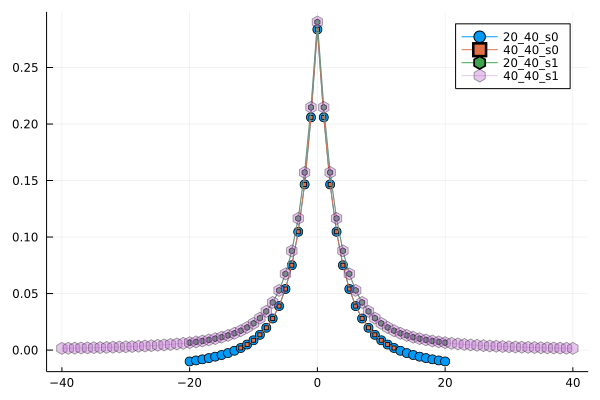

In [43]:
plot(-sP.n_iω:sP.n_iω, real(locQ_ch.χ),markershape=:circle,  markersize=5, label=labels[1])
plot!((-sP2.n_iω:sP2.n_iω)[locQ_ch2.usable_ω], real(locQ_ch2.χ[locQ_ch2.usable_ω]),markershape=:square,  markersize=2, label=labels[2])
plot!(-sP3.n_iω:sP3.n_iω, real(locQ_ch3.χ),markershape=:hexagon,markersize=3, label=labels[3])
plot!(-sP4.n_iω:sP4.n_iω, real(locQ_ch4.χ),markershape=:hexagon,markersize=6, alpha=0.4, label=labels[4])

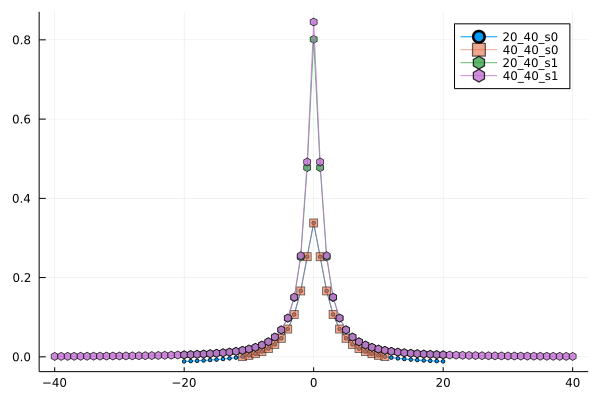

In [44]:
plot(-sP.n_iω:sP.n_iω, real(LadderDGA.kintegrate(kG, nlQ_sp.χ, dim=2)[:,1]),markershape=:circle, markersize=2, label=labels[1])
plot!((-sP2.n_iω:sP2.n_iω)[nlQ_sp2.usable_ω], real(LadderDGA.kintegrate(kG, nlQ_sp2.χ, dim=2)[nlQ_sp2.usable_ω,1]),markershape=:square, alpha=0.6, label=labels[2])
plot!(-sP3.n_iω:sP3.n_iω, real(LadderDGA.kintegrate(kG, nlQ_sp3.χ, dim=2)[:,1]),markershape=:hexagon,markersize=4, alpha=0.8, label=labels[3])
plot!(-sP4.n_iω:sP4.n_iω, real(LadderDGA.kintegrate(kG, nlQ_sp4.χ, dim=2)[:,1]),markershape=:hexagon,markersize=4, alpha=0.8, label=labels[4])